In [58]:
include(joinpath(@__DIR__, "../src/main.jl")) 
include("EAX.jl")
include("mEAX.jl")
include("Draw.jl")
using XLSX
using OffsetArrays

function Write_to_excel(row::Int, col::Int, obj::Float64)
    sheetnumber = 2
    cols = ["B", "C", "D", "E", "F", "G", "H", "I", "J", "K"]
    XLSX.openxlsx("He_Results.xlsx", mode="rw") do xf
        sheet = xf[sheetnumber]
        sheet[cols[col]*string(row)] = obj
    end
end

# instances = [:berlin52]
# Ms = [2]
# test(instances, Ms)

# dir_name = "set1"
# sample_names = ["mtsp150_3", "mtsp150_5", "mtsp150_10", "kroa200_3", "kroa200_5","kroa200_10", "lin318_3", "lin318_5", "lin318_10"]

# Solve_instances(dir_name, sample_names)


dir_name = "set1"
sample_names = ["rand100_3"]
# ["mtsp51_3", "mtsp51_5", "mtsp51_10", "mtsp100_3", "mtsp100_5", "mtsp100_10", "mtsp100_20", "mtsp150_3", "mtsp150_5", "mtsp150_10",
#      "mtsp150_20", "mtsp150_30", "gtsp150_3", "gtsp150_5", "gtsp150_10", "gtsp150_20", 
#     "gtsp150_30", "kroa200_3", "kroa200_5","kroa200_10","kroa200_20", "lin318_3", "lin318_5", "lin318_10", "lin318_20"]

best_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
worst_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
all_chrms = Chromosome[]

row = 0
for sample_name in sample_names
    row += 1
    println(sample_name)
    m, T, depot_, customers = read_data(dir_name, sample_name)
    m = 20
    Customers = copy(transpose(customers))
    depot = Float64.(depot_)
    n = size(T)[1]-2
    demands = ones(Int, n)
    W = 1000
    h = 0.1
    popsize = (10,20)
    k_tournament = 2
    num_iter = 1000000
    time_limit = (n+1)/5 #*240/100
    Mutation_Chance = 0.0
    num_runs = 10
    num_nei = 1
    avg = 0.0
    best = Inf
    worst = 0.0
    crossover_functions = [2]

    t1 = time()
    for i=1:num_runs
        P, roullet = perform_genetic_algorithm(T, m, h, popsize, 
                    k_tournament, num_iter, time_limit, Mutation_Chance, num_nei, crossover_functions, Customers, depot, verbose=true);
    #             roullet_ = roullet_ + roullet
#         Write_to_excel(row, i, P[1].fitness)
        avg += P[1].fitness
        push!(all_chrms, P[1])
        if P[1].fitness < best
            best = P[1].fitness
            best_chrm = P[1]
        end
        if P[1].fitness > worst
            worst = P[1].fitness
            worst_chrm = P[1]
        end
    end
    t2 = time()
    println("Results for ", sample_name, " ,m=", m)
    println("Best: ", round(best, digits = 2), "  Average: ", round(avg/num_runs, digits = 2), 
        "  Worst: ", round(worst, digits = 2), " , run time= ", round((t2-t1)/num_runs, digits=0))
end

rand100_3
Generation 0 the best objective is: 2299.157678942173   time left: 20.0 seconds
Generation 1000 the best objective is: 2299.157678942173   time left: 13.0 seconds
Generation 2000 the best objective is: 2299.157678942173   time left: 6.0 seconds
The best objective achieved in 2884 generations is: 2299.157678942172 and it took 20.005000114440918 seconds.
Generation 0 the best objective is: 2299.157678942173   time left: 20.0 seconds
Generation 1000

LoadError: InterruptException:

In [45]:
include("Draw.jl")
i = 3
dir_name = "set1"
sample_name = "mtsp150_3" 
m, T, depot_, customers = read_data(dir_name, sample_name)
Customers = copy(transpose(customers))
depot = Float64.(depot_)
Draw_Solution(all_chrms[i], depot, Customers, all_chrms[i].fitness)
savefig("mtsp150_5_1.pdf")

Tour 1:8621.322112430575
Tour 2:8570.378033421772
Tour 3:8614.532317845378
Tour 4:8586.524696934068
Tour 5:8526.654553128083


"C:\\Users\\sasanm\\Documents\\GitHub\\m-TSP\\extra_files\\mtsp150_5_1.pdf"

In [46]:
chrm1 = deepcopy(chrm)
chrm1.tours[1] = chrm.tours[4]
chrm1.tours[4] = chrm.tours[1]
chrm1.tours[3] = chrm.tours[5]
chrm1.tours[5] = chrm.tours[3]
Draw_Solution(chrm1, depot, Customers, chrm1.fitness)
savefig("mtsp150_5_2.pdf")

Tour 1:7090.4848653390045
Tour 2:8954.904889941228
Tour 3:7754.479635423236
Tour 4:9255.047214665958
Tour 5:9339.891307121294


"C:\\Users\\sasanm\\Documents\\GitHub\\m-TSP\\extra_files\\mtsp150_5_2.pdf"

In [47]:
# chrm = deepcopy(all_chrms[3])
# solve_all_intersections!(chrm, Customers, depot, T)
chrm2 = deepcopy(all_chrm1[10])
chrm2.tours[3] = all_chrm1[10].tours[2]
chrm2.tours[2] = all_chrm1[10].tours[3]
chrm2.tours[4] = all_chrm1[10].tours[5]
chrm2.tours[5] = all_chrm1[10].tours[4]
Draw_Solution(chrm2, depot, Customers, chrm2.fitness)
savefig("mtsp150_5_3.pdf")

Tour 1:8381.44086567786
Tour 2:8371.153744426569
Tour 3:8371.814595360958
Tour 4:8417.023245500302
Tour 5:8330.788207877387


"C:\\Users\\sasanm\\Documents\\GitHub\\m-TSP\\extra_files\\mtsp150_5_3.pdf"

In [6]:
include(joinpath(@__DIR__, "../src/main.jl")) 
T, depot, Nodes = calculate_TSPLIB(:ch150)

argmax(T[1,:])

17

In [1]:
include(joinpath(@__DIR__, "../src/main.jl")) 
using XLSX

function Write_to_excel_random(sheetnumber::Int, Instance::Int, best::Float64, avg::Float64, run_time::Float64)
    XLSX.openxlsx("Random_Results.xlsx", mode="rw") do xf
        sheet = xf[sheetnumber]
        sheet["A"*string(Instance+1)] = Instance
        sheet["B"*string(Instance+1)] = best
        sheet["C"*string(Instance+1)] = avg
        sheet["D"*string(Instance+1)] = run_time
    end
end

sheetnumber = 0

Ms = [[5, 7, 10], [5,10, 15], [10, 15, 20]]
for (i, n_c) in enumerate([50, 100, 200])
    for m in Ms[i]
        sheetnumber += 1
        for instance = 1:100
            sample_name = string(n_c) * "_" * string(m) * "_" * string(instance)
            println(sample_name)
            T, depot, customers = create_random_sample(n_c-1)
            # Customers = copy(transpose(customers))
            # depot = Float64.(depot_)
            n = size(T)[1]-2
            h = 0.1
            popsize = (10,20)
            k_tournament = 2
            num_iter = 2500
            time_limit = Inf
            Mutation_Chance = 0.0
            num_runs = 10
            num_nei = 1
            avg = 0.0
            best = Inf
            worst = 0.0
            crossover_functions = [2]

            t1 = time()
            for col=1:num_runs
                P, roullet = perform_genetic_algorithm(T, m, h, popsize, 
                            k_tournament, num_iter, time_limit, Mutation_Chance, num_nei, crossover_functions, customers, depot);

                avg += P[1].fitness
                if P[1].fitness < best
                    best = P[1].fitness
                end
                if P[1].fitness > worst
                    worst = P[1].fitness
                end
            end
            t2 = time()
            Write_to_excel_random(sheetnumber, instance, best, avg/num_runs, (t2-t1)/num_runs)
            println("Results for ", sample_name)
            println("Best: ", round(best, digits = 2), "  Average: ", round(avg/num_runs, digits = 2), 
                "  Worst: ", round(worst, digits = 2), " , run time= ", round((t2-t1)/num_runs, digits=2))
        end
        

    end
end

50_5_1
Results for 50_5_1
Best: 1.96  Average: 1.96  Worst: 1.96 , run time= 4.42
50_5_2
Results for 50_5_2
Best: 2.12  Average: 2.12  Worst: 2.12 , run time= 3.68
50_5_3
Results for 50_5_3
Best: 2.02  Average: 2.02  Worst: 2.03 , run time= 5.12
50_5_4
Results for 50_5_4
Best: 1.94  Average: 1.94  Worst: 1.94 , run time= 3.93
50_5_5
Results for 50_5_5
Best: 1.66  Average: 1.66  Worst: 1.66 , run time= 3.8
50_5_6
Results for 50_5_6
Best: 1.84  Average: 1.84  Worst: 1.84 , run time= 3.75
50_5_7
Results for 50_5_7
Best: 1.59  Average: 1.59  Worst: 1.59 , run time= 3.57
50_5_8
Results for 50_5_8
Best: 2.14  Average: 2.14  Worst: 2.14 , run time= 4.13
50_5_9
Results for 50_5_9
Best: 1.67  Average: 1.67  Worst: 1.67 , run time= 3.71
50_5_10
Results for 50_5_10
Best: 1.77  Average: 1.77  Worst: 1.77 , run time= 3.9
50_5_11
Results for 50_5_11
Best: 2.35  Average: 2.35  Worst: 2.35 , run time= 2.98
50_5_12
Results for 50_5_12
Best: 2.18  Average: 2.18  Worst: 2.18 , run time= 2.67
50_5_13
Resu

Results for 50_5_100
Best: 2.3  Average: 2.3  Worst: 2.3 , run time= 2.73
50_7_1
Results for 50_7_1
Best: 2.58  Average: 2.58  Worst: 2.58 , run time= 3.36
50_7_2
Results for 50_7_2
Best: 1.54  Average: 1.54  Worst: 1.55 , run time= 5.68
50_7_3
Results for 50_7_3
Best: 1.9  Average: 1.9  Worst: 1.9 , run time= 3.01
50_7_4
Results for 50_7_4
Best: 1.52  Average: 1.52  Worst: 1.52 , run time= 4.79
50_7_5
Results for 50_7_5
Best: 2.23  Average: 2.23  Worst: 2.23 , run time= 3.21
50_7_6
Results for 50_7_6
Best: 1.75  Average: 1.75  Worst: 1.75 , run time= 3.67
50_7_7
Results for 50_7_7
Best: 1.37  Average: 1.37  Worst: 1.37 , run time= 3.83
50_7_8
Results for 50_7_8
Best: 1.89  Average: 1.89  Worst: 1.89 , run time= 3.19
50_7_9
Results for 50_7_9
Best: 2.22  Average: 2.22  Worst: 2.22 , run time= 3.17
50_7_10
Results for 50_7_10
Best: 2.16  Average: 2.16  Worst: 2.16 , run time= 3.02
50_7_11
Results for 50_7_11
Best: 1.47  Average: 1.47  Worst: 1.47 , run time= 3.74
50_7_12
Results for 50_

Results for 50_7_99
Best: 1.69  Average: 1.69  Worst: 1.69 , run time= 2.99
50_7_100
Results for 50_7_100
Best: 2.06  Average: 2.06  Worst: 2.06 , run time= 3.18
50_10_1
Results for 50_10_1
Best: 2.06  Average: 2.06  Worst: 2.06 , run time= 3.21
50_10_2
Results for 50_10_2
Best: 1.55  Average: 1.55  Worst: 1.55 , run time= 3.75
50_10_3
Results for 50_10_3
Best: 2.09  Average: 2.09  Worst: 2.09 , run time= 3.17
50_10_4
Results for 50_10_4
Best: 2.4  Average: 2.4  Worst: 2.4 , run time= 3.27
50_10_5
Results for 50_10_5
Best: 2.06  Average: 2.06  Worst: 2.06 , run time= 3.3
50_10_6
Results for 50_10_6
Best: 2.18  Average: 2.18  Worst: 2.18 , run time= 3.21
50_10_7
Results for 50_10_7
Best: 1.37  Average: 1.37  Worst: 1.37 , run time= 4.19
50_10_8
Results for 50_10_8
Best: 1.73  Average: 1.73  Worst: 1.73 , run time= 3.06
50_10_9
Results for 50_10_9
Best: 2.22  Average: 2.22  Worst: 2.22 , run time= 3.22
50_10_10
Results for 50_10_10
Best: 2.02  Average: 2.02  Worst: 2.02 , run time= 3.24


Results for 50_10_95
Best: 1.64  Average: 1.64  Worst: 1.64 , run time= 3.24
50_10_96
Results for 50_10_96
Best: 2.32  Average: 2.32  Worst: 2.32 , run time= 3.29
50_10_97
Results for 50_10_97
Best: 1.92  Average: 1.92  Worst: 1.92 , run time= 3.01
50_10_98
Results for 50_10_98
Best: 2.13  Average: 2.13  Worst: 2.13 , run time= 3.36
50_10_99
Results for 50_10_99
Best: 1.79  Average: 1.79  Worst: 1.79 , run time= 2.86
50_10_100
Results for 50_10_100
Best: 1.37  Average: 1.37  Worst: 1.37 , run time= 3.03
100_5_1
Results for 100_5_1
Best: 2.44  Average: 2.45  Worst: 2.46 , run time= 15.62
100_5_2
Results for 100_5_2
Best: 2.35  Average: 2.35  Worst: 2.35 , run time= 9.85
100_5_3
Results for 100_5_3
Best: 2.22  Average: 2.23  Worst: 2.23 , run time= 12.41
100_5_4
Results for 100_5_4
Best: 2.14  Average: 2.14  Worst: 2.16 , run time= 13.5
100_5_5
Results for 100_5_5
Best: 1.98  Average: 1.99  Worst: 2.0 , run time= 12.58
100_5_6
Results for 100_5_6
Best: 2.25  Average: 2.25  Worst: 2.25 , 

Results for 100_5_91
Best: 2.03  Average: 2.03  Worst: 2.03 , run time= 13.01
100_5_92
Results for 100_5_92
Best: 2.13  Average: 2.14  Worst: 2.16 , run time= 11.05
100_5_93
Results for 100_5_93
Best: 2.52  Average: 2.52  Worst: 2.52 , run time= 9.66
100_5_94
Results for 100_5_94
Best: 2.43  Average: 2.43  Worst: 2.43 , run time= 16.92
100_5_95
Results for 100_5_95
Best: 2.41  Average: 2.41  Worst: 2.41 , run time= 14.28
100_5_96
Results for 100_5_96
Best: 2.43  Average: 2.44  Worst: 2.44 , run time= 15.67
100_5_97
Results for 100_5_97
Best: 2.07  Average: 2.07  Worst: 2.07 , run time= 11.12
100_5_98
Results for 100_5_98
Best: 2.34  Average: 2.34  Worst: 2.34 , run time= 9.78
100_5_99
Results for 100_5_99
Best: 2.05  Average: 2.05  Worst: 2.05 , run time= 10.17
100_5_100
Results for 100_5_100
Best: 1.91  Average: 1.91  Worst: 1.91 , run time= 10.36
100_10_1
Results for 100_10_1
Best: 2.2  Average: 2.2  Worst: 2.2 , run time= 11.91
100_10_2
Results for 100_10_2
Best: 2.34  Average: 2.34

Results for 100_10_84
Best: 2.25  Average: 2.25  Worst: 2.25 , run time= 11.36
100_10_85
Results for 100_10_85
Best: 1.99  Average: 1.99  Worst: 1.99 , run time= 12.16
100_10_86
Results for 100_10_86
Best: 1.96  Average: 1.96  Worst: 1.96 , run time= 10.39
100_10_87
Results for 100_10_87
Best: 1.65  Average: 1.65  Worst: 1.65 , run time= 12.8
100_10_88
Results for 100_10_88
Best: 1.46  Average: 1.46  Worst: 1.46 , run time= 9.45
100_10_89
Results for 100_10_89
Best: 2.52  Average: 2.52  Worst: 2.52 , run time= 11.24
100_10_90
Results for 100_10_90
Best: 1.88  Average: 1.88  Worst: 1.88 , run time= 10.91
100_10_91
Results for 100_10_91
Best: 1.83  Average: 1.83  Worst: 1.83 , run time= 10.7
100_10_92
Results for 100_10_92
Best: 1.89  Average: 1.89  Worst: 1.89 , run time= 10.58
100_10_93
Results for 100_10_93
Best: 1.68  Average: 1.68  Worst: 1.68 , run time= 10.55
100_10_94
Results for 100_10_94
Best: 2.48  Average: 2.48  Worst: 2.48 , run time= 11.57
100_10_95
Results for 100_10_95
Be

Results for 100_15_77
Best: 2.09  Average: 2.09  Worst: 2.09 , run time= 12.17
100_15_78
Results for 100_15_78
Best: 2.41  Average: 2.41  Worst: 2.41 , run time= 12.09
100_15_79
Results for 100_15_79
Best: 2.38  Average: 2.38  Worst: 2.38 , run time= 12.09
100_15_80
Results for 100_15_80
Best: 2.01  Average: 2.01  Worst: 2.01 , run time= 11.79
100_15_81
Results for 100_15_81
Best: 2.14  Average: 2.14  Worst: 2.14 , run time= 11.67
100_15_82
Results for 100_15_82
Best: 2.24  Average: 2.24  Worst: 2.24 , run time= 12.14
100_15_83
Results for 100_15_83
Best: 2.4  Average: 2.4  Worst: 2.4 , run time= 12.34
100_15_84
Results for 100_15_84
Best: 1.93  Average: 1.93  Worst: 1.93 , run time= 12.04
100_15_85
Results for 100_15_85
Best: 1.42  Average: 1.42  Worst: 1.42 , run time= 12.4
100_15_86
Results for 100_15_86
Best: 1.93  Average: 1.93  Worst: 1.93 , run time= 12.25
100_15_87
Results for 100_15_87
Best: 1.85  Average: 1.85  Worst: 1.85 , run time= 11.96
100_15_88
Results for 100_15_88
Bes

Results for 200_10_70
Best: 1.83  Average: 1.84  Worst: 1.88 , run time= 57.68
200_10_71
Results for 200_10_71
Best: 2.04  Average: 2.04  Worst: 2.04 , run time= 52.93
200_10_72
Results for 200_10_72
Best: 2.04  Average: 2.04  Worst: 2.04 , run time= 52.04
200_10_73
Results for 200_10_73
Best: 1.81  Average: 1.82  Worst: 1.83 , run time= 48.37
200_10_74
Results for 200_10_74
Best: 1.61  Average: 1.62  Worst: 1.63 , run time= 75.87
200_10_75
Results for 200_10_75
Best: 1.93  Average: 1.93  Worst: 1.93 , run time= 45.06
200_10_76
Results for 200_10_76
Best: 1.67  Average: 1.67  Worst: 1.67 , run time= 64.22
200_10_77
Results for 200_10_77
Best: 2.08  Average: 2.09  Worst: 2.1 , run time= 54.75
200_10_78
Results for 200_10_78
Best: 2.29  Average: 2.29  Worst: 2.29 , run time= 41.12
200_10_79
Results for 200_10_79
Best: 2.22  Average: 2.22  Worst: 2.22 , run time= 41.47
200_10_80
Results for 200_10_80
Best: 2.25  Average: 2.25  Worst: 2.25 , run time= 42.46
200_10_81
Results for 200_10_81


Results for 200_15_63
Best: 2.34  Average: 2.34  Worst: 2.34 , run time= 44.88
200_15_64
Results for 200_15_64
Best: 2.18  Average: 2.18  Worst: 2.18 , run time= 45.69
200_15_65
Results for 200_15_65
Best: 2.03  Average: 2.03  Worst: 2.03 , run time= 46.02
200_15_66
Results for 200_15_66
Best: 1.65  Average: 1.65  Worst: 1.65 , run time= 44.58
200_15_67
Results for 200_15_67
Best: 2.19  Average: 2.19  Worst: 2.19 , run time= 49.94
200_15_68
Results for 200_15_68
Best: 2.06  Average: 2.06  Worst: 2.06 , run time= 45.97
200_15_69
Results for 200_15_69
Best: 1.59  Average: 1.59  Worst: 1.59 , run time= 47.9
200_15_70
Results for 200_15_70
Best: 2.05  Average: 2.05  Worst: 2.05 , run time= 47.7
200_15_71
Results for 200_15_71
Best: 1.58  Average: 1.58  Worst: 1.58 , run time= 43.27
200_15_72
Results for 200_15_72
Best: 1.73  Average: 1.73  Worst: 1.73 , run time= 45.02
200_15_73
Results for 200_15_73
Best: 1.84  Average: 1.84  Worst: 1.84 , run time= 46.3
200_15_74
Results for 200_15_74
Be

Results for 200_20_56
Best: 2.47  Average: 2.47  Worst: 2.47 , run time= 56.73
200_20_57
Results for 200_20_57
Best: 2.0  Average: 2.0  Worst: 2.0 , run time= 51.78
200_20_58
Results for 200_20_58
Best: 1.59  Average: 1.59  Worst: 1.59 , run time= 51.16
200_20_59
Results for 200_20_59
Best: 1.92  Average: 1.92  Worst: 1.92 , run time= 48.77
200_20_60
Results for 200_20_60
Best: 1.48  Average: 1.48  Worst: 1.48 , run time= 49.77
200_20_61
Results for 200_20_61
Best: 2.03  Average: 2.03  Worst: 2.03 , run time= 50.74
200_20_62
Results for 200_20_62
Best: 2.23  Average: 2.23  Worst: 2.23 , run time= 50.69
200_20_63
Results for 200_20_63
Best: 2.01  Average: 2.01  Worst: 2.01 , run time= 51.94
200_20_64
Results for 200_20_64
Best: 2.15  Average: 2.15  Worst: 2.15 , run time= 52.39
200_20_65
Results for 200_20_65
Best: 2.07  Average: 2.07  Worst: 2.07 , run time= 51.42
200_20_66
Results for 200_20_66
Best: 2.27  Average: 2.27  Worst: 2.27 , run time= 59.42
200_20_67
Results for 200_20_67
Be

Tour 1:8498.94097458866
Tour 2:8444.813532996925
Tour 3:8461.769183002652
Tour 4:8481.896361493697
Tour 5:8443.0161826739


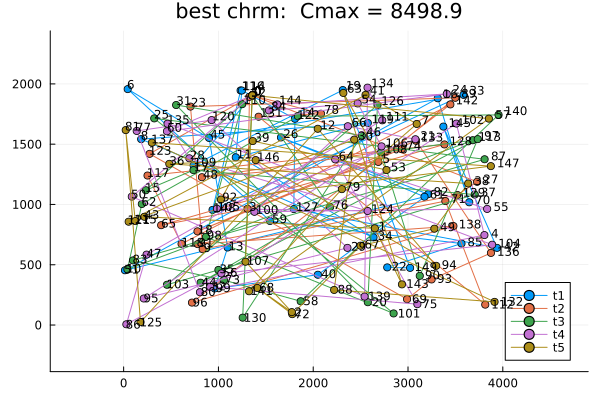

In [11]:
dir_name = "set1"
sample_name = "kroA200_10" 
m, T, depot_, customers = read_data(dir_name, sample_name)
Customers = copy(transpose(customers))
depot = Float64.(depot_)
Draw_Solution(best_chrm, depot, Customers, "best chrm: ", best_chrm.fitness)

In [43]:
depot

2-element Vector{Float64}:
 1357.0
 1905.0

Tour 1:8505.205332414915
Tour 2:8638.25031776813
Tour 3:8642.582154254334
Tour 4:8569.14114880772
Tour 5:8622.242125938697


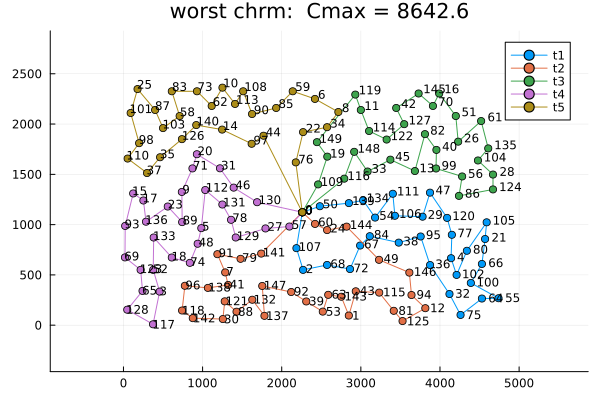

In [20]:
Draw_Solution(worst_chrm, depot, Customers, "worst chrm: ", worst_chrm.fitness)

In [16]:
Random.seed!(time())

LoadError: MethodError: no method matching seed!(::Float64)
[0mClosest candidates are:
[0m  seed!() at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\Random\src\RNGs.jl:362
[0m  seed!([91m::RandomDevice[39m) at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\Random\src\RNGs.jl:70
[0m  seed!([91m::MersenneTwister[39m) at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\Random\src\RNGs.jl:362
[0m  ...

In [26]:
length(b)

26

In [4]:
include(joinpath(@__DIR__, "../src/main.jl")) 
best_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
worst_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
row = 25
for sample_name in [:kroB150]
    T, depot, Customers = calculate_TSPLIB(sample_name)
    for m in [3, 5, 10, 20]
        row += 1
        println(sample_name,"_", m)
        all_chrms = Chromosome[]    
        n = size(T)[1]-2
        demands = ones(Int, n)
        W = 10000
        h = 0.1
        popsize = (10,20)
        k_tournament = 2
        num_iter = 10000
        time_limit = (n+1)/10
        Mutation_Chance= 0.0
        num_runs = 1
        num_nei = 1
        avg = 0.0
        best = Inf
        worst = 0.0
        crossover_functions = [2]

        t1 = time()
        for i=1:num_runs
            P, roullet = perform_genetic_algorithm(T,m, h, popsize, 
                k_tournament, num_iter, time_limit, Mutation_Chance, num_nei, crossover_functions, Customers, depot, verbose=false);
#             Write_to_excel(row, i, P[1].fitness)
            avg += P[1].fitness
            push!(all_chrms, P[1])
            if P[1].fitness < best
                best = P[1].fitness
                best_chrm = P[1]
            end
            if P[1].fitness > worst
                worst = P[1].fitness
                worst_chrm = P[1]
            end
        end
        t2 = time()
        println("Results for ", sample_name, " ,m=", m)
        println("Best: ", round(best, digits = 2), "  Average: ", round(avg/num_runs, digits = 2), 
            "  Worst: ", round(worst, digits = 2), " , run time= ", round((t2-t1)/num_runs, digits=0))
    end
end

kroA150_3
Results for kroA150 ,m=3
Best: 9649.2  Average: 9649.2  Worst: 9649.2 , run time= 15.0
kroA150_5
Results for kroA150 ,m=5
Best: 6722.83  Average: 6722.83  Worst: 6722.83 , run time= 15.0
kroA150_10
Results for kroA150 ,m=10
Best: 5477.45  Average: 5477.45  Worst: 5477.45 , run time= 15.0
kroA150_20
Results for kroA150 ,m=20
Best: 5395.2  Average: 5395.2  Worst: 5395.2 , run time= 15.0


In [65]:
T, depot, Customers = calculate_TSPLIB(:rd100)
m = 3
n_nodes = size(T)[1]-2

99

In [80]:
round(3.45)

3.0

In [25]:
c1 = destroy_and_build(c, T, n_nodes)

Chromosome([13, 12, 140, 141, 219, 147, 175, 176, 148, 149  …  236, 235, 234, 233, 232, 227, 230, 16, 15, 14], 20507.68914670878, 0.0, Tour[Tour([13, 12, 140, 141, 219, 147, 175, 176, 148, 149  …  59, 58, 57, 38, 35, 34, 28, 27, 20, 8], 20407.456796920214), Tour([9, 10, 11, 29, 30, 31, 32, 33, 36, 39  …  242, 241, 215, 216, 217, 218, 231, 19, 18, 17], 20458.946970339213), Tour([1, 2, 3, 4, 5, 6, 7, 21, 22, 23  …  236, 235, 234, 233, 232, 227, 230, 16, 15, 14], 20507.68914670878)])

In [20]:
include("Draw.jl")
Draw_Solution(best_chrm, depot, Customers, "best chrm: ", best_chrm.fitness)

Tour 1:20459.872948944416
Tour 2:20458.94697033919
Tour 3:20459.195785843633


In [26]:
include("Draw.jl")
Draw_Solution(c1, depot, Customers, "best chrm: ", c1.fitness)

Tour 1:20407.456796920214
Tour 2:20458.946970339213
Tour 3:20507.68914670878


In [20]:
length(tsp_tour)

14

In [90]:
summ = 0
for tour in c1
    println(tour.cost, "   ", find_tour_length(tour.Sequence, T))
    summ += length(tour.Sequence)
end
        

3337.849657135495   3337.8496571354954
3398.5138893534827   3398.5138893534813
3327.502689644062   3327.5026896440622


In [91]:
summ

715

In [13]:
include(joinpath(@__DIR__, "../src/main.jl")) 
instances = [:eil51, :berlin52]
Ms = [2, 3, 5]
test(instances, Ms)


Generation 0 the best objective is: 237.68042109216464   time left: Inf seconds
Generation 1000 the best objective is: 222.73337033830654   time left: Inf seconds
Generation 2000 the best objective is: 222.73337033830654   time left: Inf seconds
The best objective achieved in 2719 generations is: 222.73337033830634 and it took 5.253000020980835 seconds.
Generation 0 the best objective is: 238.31854069747305   time left: Inf seconds
Generation 1000 the best objective is: 223.06096129062732   time left: Inf seconds
Generation 2000 the best objective is: 223.06096129062732   time left: Inf seconds
The best objective achieved in 2644 generations is: 223.06096129062723 and it took 4.841000080108643 seconds.
Generation 0 the best objective is: 241.70426174935798   time left: Inf seconds
Generation 1000 the best objective is: 222.73337033830651   time left: Inf seconds
Generation 2000 the best objective is: 222.73337033830651   time left: Inf seconds
The best objective achieved in 2749 genera

LoadError: InterruptException:

In [55]:
@time begin
    length(intersect(a,b))
end

  0.000027 seconds (19 allocations: 6.547 KiB)

11

In [92]:
h = 0.15
n_nodes = size(T)[1] - 2
num = Int(ceil(h * n_nodes))
closenessT = fill(false, n_nodes + 1, n_nodes + 1)
for i = 2:n_nodes+2
    a = copy(T[i, 2:n_nodes+2])
    b = sortperm(a)
    closenessT[i-1, b[2:num+1]] .= true
end

In [96]:
typeof(closenessT)

Matrix{Bool} (alias for Array{Bool, 2})

In [95]:
Cal

151-element Vector{Float64}:
  573.0872533916629
  734.9829930005184
    0.0
 1825.821732809641
 1873.5944064818298
 1351.3034448265128
 1706.6048165876011
  984.3175300684226
 1632.1200936205644
 1716.8718647586954
 2078.871087874378
 1749.5713760804388
 1591.284386902605
    ⋮
  880.9863790093466
 1973.8540979515178
  553.2494916400738
 1474.3256085410712
  551.8858577640851
  698.1403870282825
 2282.1297070937926
 1343.2713798782434
  540.2369850352713
 1339.9970149220483
 1282.0003900155414
  573.0872533916629

In [78]:
n_nodes = size(T)[1] - 2
closenessT = fill(false, n_nodes + 1, n_nodes + 1)
a = copy(T[2, 2:n_nodes+1])
b = sortperm(a)
# num = 5
b[2:num+1]

45-element Vector{Int64}:
 143
  43
  53
  63
 115
  72
  39
  81
  68
  49
 125
  67
   2
   ⋮
 132
 141
  32
 111
  29
 109
 116
  27
  75
   4
  88
 102

In [71]:
closenessT[2, b[2:num+1]] .= true

5-element view(::Matrix{Bool}, 2, [143, 43, 53, 63, 115]) with eltype Bool:
 1
 1
 1
 1
 1

In [72]:
closenessT

150×150 Matrix{Bool}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0    